In [2]:
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
sys.path.append("/Users/santy/Google Drive/github projects/questaal-reader")
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp

In [1]:
import sys
sys.path.append("/Users/santy/Google Drive/github projects/questaal-reader")
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
# from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf
from pysciplottk.easyplotter import EasyPlotter
from scipy.ndimage import gaussian_filter1d

In [55]:
p_bse=get_bands("../data/bnds_BSE.temp",coords_are_cartesian=False)
p_bse.efermi=p_bse.efermi+.06

In [62]:
print("direct",p_bse.get_direct_band_gap_dict())
print("Indirect",p_bse.get_band_gap())

direct {<Spin.up: 1>: {'value': 4.442258767438498, 'kpoint_index': 425, 'band_indices': [51, 52]}}
Indirect {'direct': False, 'energy': 4.030006269265798, 'transition': '(0.000,0.450,0.500)-\\Gamma'}


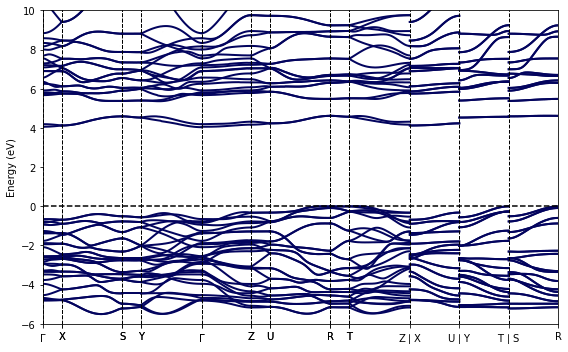

In [21]:
fig,ax=plt.subplots(figsize=(8,5))
colors = ["#e71d36","#ff9f1c","#03045e"]
bp_plot=bp(p_bse).bs_plot_data()
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy']['1'][i]
    for k in e:
        if k[0]>0:ls="-"
        else:ls="-"
        c=colors[2]
        ax.plot(d,k,c=c,lw=2,ls=ls,alpha=1)        

for j,i in enumerate(bp_plot['ticks']["distance"]):
        ax.axvline(i,c="k",ls="--",lw=1)
ax.axhline(0,c="k",ls="--")
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=10)
ax.set_ylim(-6,10)
ax.set_ylabel("Energy (eV)")
ax.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()
plt.savefig("../figures/bands_BSE.pdf",dpi=300)
plt.show()

In [4]:
# p_gw=get_bands("data/bnds_gw.temp",coords_are_cartesian=False)
# p_bse=get_bands("data/bnds_bse.temp",coords_are_cartesian=False)
# p_lda=get_bands("data/bnds_LDA.temp",coords_are_cartesian=False)
# # for i in [p_gw,p_bse,p_lda]: 
#     i.efermi=list(i.bands.values())[0][10].max()
# p_gw_ladder.efermi=np.max(list(p_gw_ladder.bands.values())[0][10])
# p_gw.efermi=np.max(list(p_gw.bands.values())[0][10])
# p_lda.efermi=np.max(list(p_lda.bands.values())[0][10])

In [23]:
import re
def get_eps(fname,sigma=.01):
    def norm(x):
        return x / np.trapz(x)
    spectrum = lambda y,sigma:gaussian_filter1d(y, sigma)
    E=np.loadtxt(fname,comments="#").T
    r=spectrum(E[2],sigma)
    return [E[0],r]

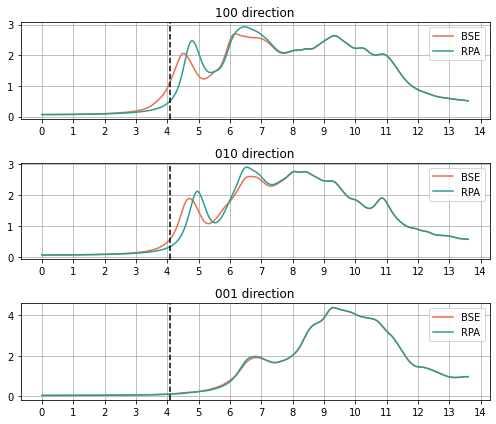

In [57]:
bse={};rpa={}
fig,ax1=plt.subplots(3,1,figsize=(7,6))
for i,direction in enumerate(["100","010","001"]):
    bse[direction]=get_eps(f"../data/BSE_{direction}.eps")
    rpa[direction]=get_eps(f"../data/RPA_{direction}.eps")
    ax1[i].plot(bse[direction][0],bse[direction][1],label="BSE",c="#e76f51")
    ax1[i].plot(rpa[direction][0],rpa[direction][1],label="RPA",c="#2a9d8f")
    ax1[i].set_title(direction+" direction")
    ax1[i].legend()
    ax1[i].grid()
    ax1[i].axvline(4.08997,c="k",ls="--")
    ax1[i].set_xticks(np.arange(0,15))
plt.tight_layout()
plt.savefig("../figures/BSE-RPA.pdf",dpi=300)
plt.show()

In [32]:
with open('../data/Eigenvals_bse') as f:
    evals = np.array([list(map(float, i[2:-2].split(','))) for i in f]).T[0]*13.6056980659

/Users/santy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


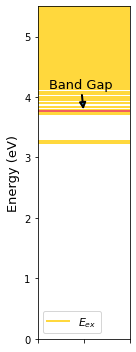

In [52]:

# matplotlib.rcParams.update({'font.size': 18})
# matplotlib.rcParams['axes.linewidth'] = 2
fig2 = plt.figure(figsize=(2,5),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig2)
#plt.scatter(evals,range(len(evals)),s=3)
ax =  fig2.add_subplot(spec2[0, 0])
for i in evals[evals<5.5]:
    ax.axhline(i,c="#FFD83D",alpha=1,lw=2)
ax.axhline(evals[0],c="#FFD83D",alpha=1,lw=2,label="$E_{ex}$")
plt.legend(fontsize=11)
ax.axhline(3.7625,c="#f25f5c",linestyle="-",lw=2,alpha=1)
ax.set_ylabel("Energy (eV)",fontsize=13)
# ax.fill_between([-1,3],[5,5],[-1,3])
ax.annotate('Band Gap',
            xy=(.5, 3.7625),
            xytext=(.125, 4.1), 
            fontsize=13, 
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",linewidth=2),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
ax.set_ylim([0,5.5])
ax.set_xticklabels("")
plt.tight_layout()
plt.savefig("../figures/Excitons.pdf",dpi=300)

plt.show()